# The tf.data API

In [3]:
import tensorflow as tf

In [4]:
X=tf.constant([1,2,3,4,5,6,7,8,9])
dataset=tf.data.Dataset.from_tensor_slices(X)

In [5]:
dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [6]:
for item in dataset:
    print(item)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


2025-07-25 13:52:53.103329: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [7]:
X=tf.range(10)
dataset=tf.data.Dataset.from_tensor_slices(X)
dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [8]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


2025-07-25 13:52:53.112270: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [9]:
dataset=tf.data.Dataset.range(3)
dataset

<_RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

In [10]:
try:
    dataset[3]
except TypeError as ex:
    print(ex)


'_RangeDataset' object is not subscriptable


### tf.data Dataset with Structured Data

#### Tuple of Tensors

In [13]:
X = tf.constant([[1, 2], [3, 4], [5, 6]])
y = tf.constant([0, 1, 0])
dataset = tf.data.Dataset.from_tensor_slices((X, y))

In [14]:
for item in dataset:
    print(item)

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 4], dtype=int32)>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([5, 6], dtype=int32)>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)


#### Dictionary of Tensors

In [16]:
inputs = {
    "feature1": tf.constant([1.0, 2.0, 3.0]),
    "feature2": tf.constant([10.0, 20.0, 30.0])
}

dataset = tf.data.Dataset.from_tensor_slices(inputs)

In [17]:
for item in dataset:
    print(item)

{'feature1': <tf.Tensor: shape=(), dtype=float32, numpy=1.0>, 'feature2': <tf.Tensor: shape=(), dtype=float32, numpy=10.0>}
{'feature1': <tf.Tensor: shape=(), dtype=float32, numpy=2.0>, 'feature2': <tf.Tensor: shape=(), dtype=float32, numpy=20.0>}
{'feature1': <tf.Tensor: shape=(), dtype=float32, numpy=3.0>, 'feature2': <tf.Tensor: shape=(), dtype=float32, numpy=30.0>}


2025-07-25 13:52:53.160731: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


####  Nested Tuple + Dictionary

In [19]:
X = tf.constant([[1, 2], [3, 4], [5, 6]])
y = tf.constant([0, 1, 0])
meta = tf.constant([100, 200, 300])

dataset = tf.data.Dataset.from_tensor_slices(((X, meta), y))

In [20]:
for item in dataset:
    print(item,"\n")

((<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>, <tf.Tensor: shape=(), dtype=int32, numpy=100>), <tf.Tensor: shape=(), dtype=int32, numpy=0>) 

((<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 4], dtype=int32)>, <tf.Tensor: shape=(), dtype=int32, numpy=200>), <tf.Tensor: shape=(), dtype=int32, numpy=1>) 

((<tf.Tensor: shape=(2,), dtype=int32, numpy=array([5, 6], dtype=int32)>, <tf.Tensor: shape=(), dtype=int32, numpy=300>), <tf.Tensor: shape=(), dtype=int32, numpy=0>) 



## Chaining Transformations

In [22]:
dataset=tf.data.Dataset.from_tensor_slices(tf.range(10))
dataset=dataset.repeat(3).batch(7)

In [23]:
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


In [24]:
dataset=dataset.map(lambda x:x*2)   # x is a batch
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
tf.Tensor([16 18], shape=(2,), dtype=int32)


In [25]:
dataset=dataset.filter(lambda x:tf.reduce_sum(x)>50)  # x is a batch
for item in dataset:
    print(item)

tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)


2025-07-25 13:52:53.230043: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [26]:
for item in dataset.take(2):
    print(item)

tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)


In [27]:
import time

def slow_map_fn(x):
    tf.print("Processing", x)
    time.sleep(1)  # simulate slow processing
    return x * x

dataset=tf.data.Dataset.range(10)
dataset=dataset.map(lambda x: tf.py_function(slow_map_fn, [x], tf.int64)
                      ,num_parallel_calls=tf.data.AUTOTUNE)
for item in dataset:
    print(item.numpy())

Processing 0
Processing 7
Processing 5
Processing 6
Processing 4
Processing 2
Processing 1
Processing 3
0
Processing 8
1
4
Processing 9
9
16
25
36
49
64
81


## Shuffling the data

In [29]:
#This will shuffle batches
dataset=tf.data.Dataset.range(10).repeat(2).batch(7)
dataset=dataset.shuffle(buffer_size=4)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([4 5 6 7 8 9], shape=(6,), dtype=int64)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int64)


In [30]:
#This Shuffles individual elements
dataset=tf.data.Dataset.range(20)
dataset=dataset.shuffle(buffer_size=10).batch(7)
for item in dataset:
    print(item)

tf.Tensor([ 5  4  7  8  6  9 11], shape=(7,), dtype=int64)
tf.Tensor([14  1 16  3  0  2 15], shape=(7,), dtype=int64)
tf.Tensor([19 17 18 13 12 10], shape=(6,), dtype=int64)


## Interleaving lines from multiple files

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing=fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,
                                                         housing.target.reshape(-1,1),random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [33]:
from pathlib import Path
import numpy as np

def save_to_csv_files(data,name_prefix,header=None,n_parts=10):
    housing_dir=Path()/"datasets"/"housing"
    housing_dir.mkdir(parents=True,exist_ok=True)
    filename_format="my_{}_{:02d}.csv"

    filepaths=[]
    m=len(data)
    chunks=np.array_split(np.arange(m),n_parts)

    for file_idx,row_indices in enumerate(chunks):
        part_csv=housing_dir/filename_format.format(name_prefix,file_idx)
        filepaths.append(str(part_csv))
        with open(part_csv,"w") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([str(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

train_data=np.c_[X_train,y_train]
valid_data=np.c_[X_valid,y_valid]
test_data=np.c_[X_test,y_test]
header_cols=housing.feature_names+["MedianHouseValue"]
header=",".join(header_cols)


In [34]:
train_filepaths=save_to_csv_files(train_data,"train",header,n_parts=20)
valid_filepaths=save_to_csv_files(valid_data,"valid",header,n_parts=10)
test_filepaths=save_to_csv_files(test_data,"test",header,n_parts=10)

In [35]:
print("".join(open(train_filepaths[0]).readlines()[:4]))

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442
5.3275,5.0,6.490059642147117,0.9910536779324056,3464.0,3.4433399602385686,33.69,-117.39,1.687
3.1,29.0,7.5423728813559325,1.5915254237288134,1328.0,2.2508474576271187,38.44,-122.98,1.621



In [36]:
train_filepaths

['datasets/housing/my_train_00.csv',
 'datasets/housing/my_train_01.csv',
 'datasets/housing/my_train_02.csv',
 'datasets/housing/my_train_03.csv',
 'datasets/housing/my_train_04.csv',
 'datasets/housing/my_train_05.csv',
 'datasets/housing/my_train_06.csv',
 'datasets/housing/my_train_07.csv',
 'datasets/housing/my_train_08.csv',
 'datasets/housing/my_train_09.csv',
 'datasets/housing/my_train_10.csv',
 'datasets/housing/my_train_11.csv',
 'datasets/housing/my_train_12.csv',
 'datasets/housing/my_train_13.csv',
 'datasets/housing/my_train_14.csv',
 'datasets/housing/my_train_15.csv',
 'datasets/housing/my_train_16.csv',
 'datasets/housing/my_train_17.csv',
 'datasets/housing/my_train_18.csv',
 'datasets/housing/my_train_19.csv']

In [37]:
test_filepaths

['datasets/housing/my_test_00.csv',
 'datasets/housing/my_test_01.csv',
 'datasets/housing/my_test_02.csv',
 'datasets/housing/my_test_03.csv',
 'datasets/housing/my_test_04.csv',
 'datasets/housing/my_test_05.csv',
 'datasets/housing/my_test_06.csv',
 'datasets/housing/my_test_07.csv',
 'datasets/housing/my_test_08.csv',
 'datasets/housing/my_test_09.csv']

#### Building an Input Pipeline

In [39]:
filepath_dataset=tf.data.Dataset.list_files(train_filepaths,seed=42)

In [40]:
for filepath in filepath_dataset:
    print(filepath)

tf.Tensor(b'datasets/housing/my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_17.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_00.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_14.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_13.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_15.csv', shape=(), dtype=string)
tf.Ten

In [41]:
n_readers=5
dataset=filepath_dataset.interleave(
    lambda filepath:tf.data.TextLineDataset(filepath).skip(1),
    cycle_length=n_readers
)

In [42]:
for line in dataset.take(4):
    print(line)

tf.Tensor(b'4.5909,16.0,5.475877192982456,1.0964912280701755,1357.0,2.9758771929824563,33.63,-117.71,2.418', shape=(), dtype=string)
tf.Tensor(b'2.4792,24.0,3.4547038327526134,1.1341463414634145,2251.0,3.921602787456446,34.18,-118.38,2.0', shape=(), dtype=string)
tf.Tensor(b'4.2708,45.0,5.121387283236994,0.953757225433526,492.0,2.8439306358381504,37.48,-122.19,2.67', shape=(), dtype=string)
tf.Tensor(b'2.1856,41.0,3.7189873417721517,1.0658227848101265,803.0,2.0329113924050635,32.76,-117.12,1.205', shape=(), dtype=string)


## Preprocessing the Data

In [44]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [45]:
X_mean,X_std=scaler.mean_,scaler.scale_
n_inputs=8

def parse_csv_line(line):
    defs=[0.]*n_inputs+[tf.constant([],dtype=tf.float32)]
    fields=tf.io.decode_csv(line,record_defaults=defs)
    return tf.stack(fields[:-1]),tf.stack(fields[-1:])

def preprocess(line):
    x,y=parse_csv_line(line)
    return (x-X_mean)/X_std,y

In [46]:
preprocess(b'3.5214,15.0,3.0499445061043287,1.106548279689234,,1.6059933407325193,37.63,-122.43,0')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([-0.19397889, -1.0778131 , -0.9433854 ,  0.01485314, -1.2998114 ,
        -0.5729162 ,  0.9292612 , -1.4221538 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>)

## Putting Everything Together + Prefetching

In [48]:
def csv_reader_dataset(filepath,n_readers=5,n_read_threads=None,n_parse_threads=4,
                      shuffle_buffer_size=10000,seed=42,batch_size=32,repeat=False):
    dataset=tf.data.Dataset.list_files(filepath,seed=seed)
    dataset=dataset.interleave(
        lambda filepath:tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers,num_parallel_calls=n_read_threads  )
    dataset=dataset.map(preprocess,num_parallel_calls=n_parse_threads)
    dataset=dataset.shuffle(buffer_size=shuffle_buffer_size,seed=seed)
    if repeat:
        dataset=dataset.repeat()
    
    return dataset.batch(batch_size).prefetch(1)

In [49]:
example_set=csv_reader_dataset(train_filepaths,batch_size=4)
for X_batch,y_batch in example_set.take(2):
    print("X =",X_batch)
    print("y =",y_batch)
    print()

X = tf.Tensor(
[[-1.3957452  -0.04940685 -0.22830808  0.22648273  2.2593622   0.35200632
   0.9667386  -1.4121602 ]
 [ 2.7112627  -1.0778131   0.69413143 -0.14870553  0.51810503  0.3507294
  -0.82285154  0.80680597]
 [-0.13484643 -1.868895    0.01032507 -0.13787179 -0.12893449  0.03143518
   0.2687057   0.13212144]
 [ 0.09031774  0.9789995   0.1327582  -0.13753782 -0.23388447  0.10211545
   0.97610843 -1.4121602 ]], shape=(4, 8), dtype=float32)
y = tf.Tensor(
[[1.819]
 [3.674]
 [0.954]
 [2.725]], shape=(4, 1), dtype=float32)

X = tf.Tensor(
[[ 0.05218809 -2.0271113   0.2940109  -0.02403445  0.16218767 -0.02844518
   1.4117942  -0.93737936]
 [-0.672276    0.02970133 -0.76922584 -0.15086786  0.4962024  -0.02741998
  -0.7853724   0.77182245]
 [-0.8111771   0.34613404 -0.21826383 -0.0801027   0.06636376  0.26724264
   0.1937491   0.30204034]
 [-0.689403    1.8491895  -0.80511904 -0.08778115  1.0903106  -0.36003128
   0.994848   -1.4171551 ]], shape=(4, 8), dtype=float32)
y = tf.Tensor(
[[1

## Using Dataset with Keras

In [51]:
train_set=csv_reader_dataset(train_filepaths,repeat=True)
valid_set=csv_reader_dataset(valid_filepaths)
test_set=csv_reader_dataset(test_filepaths,repeat=True)

In [52]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(42)

In [53]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(20,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1)
])

In [54]:
model.compile(loss="mse",optimizer="nadam")

step_per_epoch=len(X_train)//32
validation_steps=len(X_valid)//32
model.fit(train_set,
         epochs=3,
         steps_per_epoch=step_per_epoch,
         validation_data=valid_set,
         validation_steps=validation_steps)

Epoch 1/3
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - loss: 3.8101 - val_loss: 3.9114
Epoch 2/3
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 0.9672 - val_loss: 0.8660
Epoch 3/3
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.6777 - val_loss: 0.6843


In [55]:
model.evaluate(test_set,steps=len(X_test)//32)

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.5918 


0.5716007947921753

In [56]:
new_set=test_set.take(2)
y_pred=model.predict(new_set)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [57]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
loss_fn=tf.keras.losses.MeanSquaredError()
steps_per_epoch = len(X_train) // 32
n_epochs=5

for epoch in range(1,n_epochs+1):
    print("\rEpoch: {}/{}".format(epoch,n_epochs),end="")
    for X_batch,y_batch in train_set.take(steps_per_epoch):
        with tf.GradientTape() as tape:
            y_pred=model(X_batch)
            main_loss=tf.reduce_mean(loss_fn(y_batch,y_pred))
            loss=tf.add_n([main_loss]+model.losses)

        gradient=tape.gradient(loss,model.trainable_variables)
        optimizer.apply_gradients(zip(gradient,model.trainable_variables))
print("\nTraining Completed!")

Epoch: 1/5

2025-07-25 13:53:00.072753: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 5/5
Training Completed!


In [58]:
@tf.function
def train_step(model,X_batch,y_batch,optimizer,loss_fn):
    with tf.GradientTape() as tape:
        
        y_pred=model(X_batch)
        main_loss=tf.reduce_mean(loss_fn(y_batch,y_pred))
        loss=tf.add_n([main_loss]+model.losses)
    gradient=tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradient,model.trainable_variables))
    
        


steps_per_epoch=len(X_train)//32
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
loss_fn=tf.keras.losses.MeanSquaredError()
n_epochs=5

for epoch in range(1,n_epochs+1):
    print("\rEpoch: {}/{}".format(epoch,n_epochs),end="")
    for X_batch,y_batch in train_set.take(steps_per_epoch):       
        train_step(model,X_batch,y_batch,optimizer,loss_fn)
print("\nTraining Completed!")

Epoch: 5/5
Training Completed!


# The TFRecord Format

In [60]:
with tf.io.TFRecordWriter("my_data.tfrecord") as f:
    f.write(b"This is the first record.")
    f.write(b"This is just after first record")

In [61]:
filepaths=["my_data.tfrecord"]

dataset=tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record.', shape=(), dtype=string)
tf.Tensor(b'This is just after first record', shape=(), dtype=string)


2025-07-25 13:53:11.960428: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:381] TFRecordDataset `buffer_size` is unspecified, default to 262144


In [62]:

filepaths=["my_test_{}".format(i) for i in range(5)]
for i ,filepath in enumerate(filepaths):
   with tf.io.TFRecordWriter(filepath) as f:
       for j in range(3):
           f.write("File: {} Record: {}".format(i,j))

dataset=tf.data.TFRecordDataset(filepaths,num_parallel_reads=3)
for item in dataset:
    print(item)
       
    


tf.Tensor(b'File: 0 Record: 0', shape=(), dtype=string)
tf.Tensor(b'File: 1 Record: 0', shape=(), dtype=string)
tf.Tensor(b'File: 2 Record: 0', shape=(), dtype=string)
tf.Tensor(b'File: 0 Record: 1', shape=(), dtype=string)
tf.Tensor(b'File: 1 Record: 1', shape=(), dtype=string)
tf.Tensor(b'File: 2 Record: 1', shape=(), dtype=string)
tf.Tensor(b'File: 0 Record: 2', shape=(), dtype=string)
tf.Tensor(b'File: 1 Record: 2', shape=(), dtype=string)
tf.Tensor(b'File: 2 Record: 2', shape=(), dtype=string)
tf.Tensor(b'File: 3 Record: 0', shape=(), dtype=string)
tf.Tensor(b'File: 4 Record: 0', shape=(), dtype=string)
tf.Tensor(b'File: 3 Record: 1', shape=(), dtype=string)
tf.Tensor(b'File: 4 Record: 1', shape=(), dtype=string)
tf.Tensor(b'File: 3 Record: 2', shape=(), dtype=string)
tf.Tensor(b'File: 4 Record: 2', shape=(), dtype=string)


## Compressed TFRecord Files

In [64]:
options=tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter("my_compressed.tfrecord",options) as f:
    f.write(b"Compress, compress, compress!")
dataset=tf.data.TFRecordDataset(["my_compressed.tfrecord"],compression_type="GZIP")

for item in dataset:
    print(item)

tf.Tensor(b'Compress, compress, compress!', shape=(), dtype=string)


## Protocol Buffers

In [66]:
%%writefile person.proto
syntax="proto3";
message Person{
    string name=1;
    int32 id=2;
    repeated string email=3;
}

Overwriting person.proto


In [67]:
!protoc person.proto --python_out=. --descriptor_set_out=person.desc --include_imports

In [68]:
from person_pb2 import Person

person=Person(name="AGI",id=222,email=["abc@d.com"])

In [69]:
person

name: "AGI"
id: 222
email: "abc@d.com"

In [70]:
person.name

'AGI'

In [71]:
person.name="ASI"

In [72]:
person

name: "ASI"
id: 222
email: "abc@d.com"

In [73]:
person.email.append("dd@g.com")

In [74]:
person

name: "ASI"
id: 222
email: "abc@d.com"
email: "dd@g.com"

In [75]:
serialized = person.SerializeToString()
serialized

b'\n\x03ASI\x10\xde\x01\x1a\tabc@d.com\x1a\x08dd@g.com'

In [76]:
person2=Person()
person2.ParseFromString(serialized)

29

In [77]:
person2==person

True

#### Custom Protobuf

In [79]:
person_tf=tf.io.decode_proto(
    bytes=serialized,
    message_type="Person",
    field_names=["name","id","email"],
    output_types=[tf.string,tf.int32,tf.string],
    descriptor_source="person.desc"
)

In [80]:
person_tf.values

[<tf.Tensor: shape=(1,), dtype=string, numpy=array([b'ASI'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([222], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'abc@d.com', b'dd@g.com'], dtype=object)>]

### TensorFlow Protobufs

In [82]:
from tensorflow.train import BytesList,FloatList,Int64List
from tensorflow.train import Feature,Example,Features

person_example=Example(
    features=Features(
        feature={
            "name":Feature(bytes_list=BytesList(value=[b"AGI"])),
            "id":Feature(int64_list=Int64List(value=[123])),
            "email":Feature(bytes_list=BytesList(value=[b"a@b.com",
                                                        b"c@d.com"]))
        }
    )
)

In [83]:
with tf.io.TFRecordWriter("my_contacts.tfrecord") as f:
    for _ in range(5):
        f.write(person_example.SerializeToString())

### Loading and Parsing

In [85]:
feature_description={
    "name": tf.io.FixedLenFeature([],tf.string,default_value=""),
    "id": tf.io.FixedLenFeature([],tf.int64,default_value=0),
    "email": tf.io.VarLenFeature(tf.string)
}

def parse(serialized_example):
    return tf.io.parse_single_example(serialized_example,feature_description)

dataset=tf.data.TFRecordDataset(["my_contacts.tfrecord"]).map(parse)

for record in dataset:
    print(record)

{'email': SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)), 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'AGI'>}
{'email': SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)), 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'AGI'>}
{'email': SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)), 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'AGI'>}
{'email': SparseTensor(indices=tf.Tensor(
[[0]
 [

In [86]:
tf.sparse.to_dense(record["email"])

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [87]:
record["email"].values

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [88]:
def parse(serialized_example):
    return tf.io.parse_example(serialized_example,feature_description)

dataset=tf.data.TFRecordDataset(["my_contacts.tfrecord"]).batch(2).map(parse)

In [89]:
for record in dataset:
    print(record)

{'email': SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [1 0]
 [1 1]], shape=(4, 2), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com' b'a@b.com' b'c@d.com'], shape=(4,), dtype=string), dense_shape=tf.Tensor([2 2], shape=(2,), dtype=int64)), 'id': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([123, 123])>, 'name': <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'AGI', b'AGI'], dtype=object)>}
{'email': SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [1 0]
 [1 1]], shape=(4, 2), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com' b'a@b.com' b'c@d.com'], shape=(4,), dtype=string), dense_shape=tf.Tensor([2 2], shape=(2,), dtype=int64)), 'id': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([123, 123])>, 'name': <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'AGI', b'AGI'], dtype=object)>}
{'email': SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([1 2], 

In [90]:
record

{'email': SparseTensor(indices=tf.Tensor(
 [[0 0]
  [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([1 2], shape=(2,), dtype=int64)),
 'id': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([123])>,
 'name': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'AGI'], dtype=object)>}

###  Convert CSV → TFRecord → Load TFRecord and Parse

In [92]:
# Prepare sample csv
import csv 
rows = [
    ["name", "age", "weight"],
    ["Alice", 25, 55.5],
    ["Bob", 30, 72.3],
    ["Charlie", 22, 60.0]
]

with open("people.csv","w",newline="") as f:
    writer=csv.writer(f)
    writer.writerows(rows)

In [93]:
#Convert CSV to TFRecord
def new_person_example(name,age,weight):
    return Example(
    features=Features(
        feature={
            "name":Feature(bytes_list=BytesList(value=[name.encode()])),
            "age":Feature(int64_list=Int64List(value=[age])),
            "weight":Feature(float_list=FloatList(value=[weight]))
            
        }
    )
)

with open("people.csv") as f,tf.io.TFRecordWriter("people.tfrecord") as writer:
    next(f) #skip header
    for line in f:
        name,age,weight=line.strip().split(",")
        example=new_person_example(name,int(age),float(weight))
        writer.write(example.SerializeToString())

In [94]:
#Load and Parse TFRecord
feature_description={
    "name":tf.io.FixedLenFeature([],tf.string),
    "age":tf.io.FixedLenFeature([],tf.int64),
    "weight":tf.io.FixedLenFeature([],tf.float32)
}

def parse(serialized_example):
    return tf.io.parse_single_example(serialized_example,feature_description)

dataset=tf.data.TFRecordDataset(["people.tfrecord"])
dataset=dataset.map(parse)

for record in dataset:
    print("Name:",record["name"].numpy().decode())
    print("Age:",record["age"].numpy())
    print("Weight:",record["weight"].numpy())
    print("----------")


Name: Alice
Age: 25
Weight: 55.5
----------
Name: Bob
Age: 30
Weight: 72.3
----------
Name: Charlie
Age: 22
Weight: 60.0
----------


## Storing Images and Tensors in TFRecords

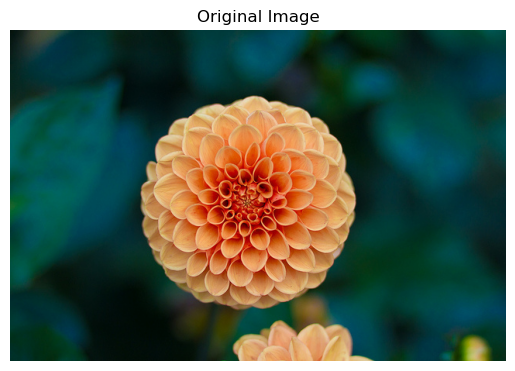

In [96]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_images

image=load_sample_images()["images"][1]
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()

In [97]:
image.shape

(427, 640, 3)

In [98]:
data=tf.io.encode_jpeg(image).numpy()

example_with_image=Example(
    features=Features(
        feature={
            "image":Feature(bytes_list=BytesList(value=[data]))
        }
    )
)

serialized_example=example_with_image.SerializeToString()
with tf.io.TFRecordWriter("my_image.tfrecord") as f:
    f.write(serialized_example)

2025-07-25 13:53:12.713369: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


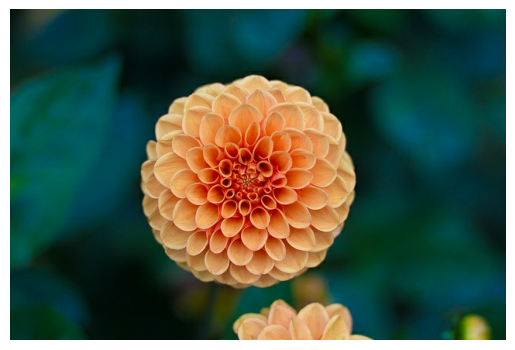

In [99]:
feature_description={
    "image":tf.io.VarLenFeature(tf.string)
}

def parse(serialized_example):
    example_with_image=tf.io.parse_single_example(serialized_example,feature_description)
    return tf.io.decode_jpeg(example_with_image["image"].values[0])


dataset=tf.data.TFRecordDataset("my_image.tfrecord").map(parse)

for image in dataset:  
    plt.imshow(image)
    plt.axis("off")
    

In [100]:
import os 

def _bytes_feature(value):
    return Feature(bytes_list=BytesList(value=[value]))

def _int64_feature(value):
    return Feature(int64_list=Int64List(value=[value]))

def image_example(image_string,label):
    feature={
        "image":_bytes_feature(image_string),
        "label":_int64_feature(label)
    }
    return Example(features=Features(feature=feature))

In [101]:
image_dir="images"
tfrecord_file="images.tfrecord"

with tf.io.TFRecordWriter(tfrecord_file)as writer:
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg"):
            path=os.path.join(image_dir,filename)
            label= 0 if "cat" in filename else 1


            img_raw=tf.io.read_file(path).numpy()
            example=image_example(img_raw,label)
            writer.write(example.SerializeToString())
    

In [102]:
feature_description={
    "image":tf.io.FixedLenFeature([],tf.string),
    "label":tf.io.FixedLenFeature([],tf.int64)
}

def parse(serialized_example):
    parsed=tf.io.parse_single_example(serialized_example,feature_description)
    img=tf.io.decode_image(parsed["image"],channels=3)
    label=parsed["label"]
    return img,label
    

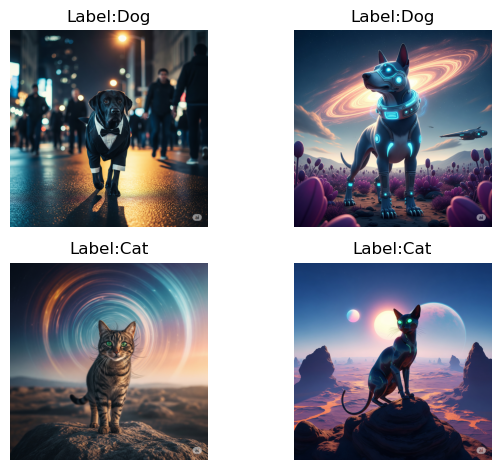

In [103]:
dataset=tf.data.TFRecordDataset(["images.tfrecord"]).map(parse)

for idx,(img,label) in enumerate(dataset):
    plt.subplot(2,2,idx+1)
    plt.imshow(img.numpy())
    plt.title(f"Label:{"Cat"if label==0 else "Dog"}")
    plt.axis("off")
plt.tight_layout()
